<a href="https://colab.research.google.com/github/fidanfatih/Telecom_Company_Churn_Project/blob/main/customer_churn_project_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Telecom customer churn prediction

This data set consists of 100 variables and approx 100 thousand records. This data set contains different variables explaining the attributes of telecom industry and various factors considered important while dealing with customers of telecom industry. The target variable here is churn which explains whether the customer will churn or not. We can use this data set to predict the customers who would churn or who wouldn't churn depending on various variables available.

In [254]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats.mstats import winsorize

import re
import gc
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [256]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/Telecom_customer churn.zip')
# data = pd.read_csv('Telecom_customer churn.zip')
telco= data.copy()
telco.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
4444,42.0375,126.50,30.00,1.2375,18.50,6.4750,6.475,0.0000,0.0,-123.50,-8.7875,3.000000,0.0,0.0,0.0,11.333333,0.0,63.000000,0.000000,2.666667,0.0,48.666667,0.000000,0.0,0.0,0.0,2.333333,0.000000,117.476667,0.000000,1.596667,4.333333,2.616667,0.000000,0.000000,27.000000,0.000000,43.286667,0.000000,22.333333,0.0,75.786667,0.0,3.000000,63.000000,48.666667,0.0,0.000000,1,36,1,1,Y,B,N,3274,6937.0,1682.85,1627.51,6845.0,3220,47.87,201.32,94.71,168,56,45,124.0,46.0,40.0,U,NEW YORK CITY AREA,N,N,29.98999,1.0,1.0,WC,0.0,0.0,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,0.0,I,U,U,U,U,U,N,1083.0,1004445
84393,29.9900,85.00,39.99,0.0000,0.00,0.0000,0.000,0.0000,0.0,80.00,0.0000,0.333333,0.0,0.0,0.0,20.333333,0.0,55.333333,0.000000,0.666667,0.0,34.666667,0.000000,0.0,0.0,0.0,0.333333,0.000000,33.643333,0.000000,0.810000,22.333333,24.840000,0.333333,0.743333,17.333333,0.000000,25.330000,0.000000,18.000000,0.0,9.123333,0.0,0.333333,55.333333,34.666667,0.0,0.000000,1,13,2,1,U,BA,N,784,1632.0,373.31,335.89,1616.0,779,30.54,146.91,70.82,58,35,30,105.0,51.0,31.0,S,GREAT LAKES AREA,N,N,29.98999,1.0,1.0,WC,0.0,0.0,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,U,U,U,U,U,N,366.0,1084394
68393,29.9900,0.00,39.99,0.0000,0.00,0.0000,0.000,0.0000,0.0,0.00,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1,13,2,2,Y,BA,N,886,2892.0,392.11,332.13,2892.0,886,27.68,241.00,73.83,0,0,30,196.0,63.0,33.0,T,CENTRAL/SOUTH TEXAS AREA,Y,N,29.98999,1.0,1.0,WC,1.0,0.0,NaN,5.0,S,B,1.0,M,6.0,NaN,C,A,0.0,H,U,U,U,U,U,N,377.0,1068394
40397,40.6850,274.50,32.49,1.2375,13.00,3.9675,3.675,0.2925,0.0,-113.50,-4.0350,2.333333,0.0,6.0,0.0,10.000000,0.0,121.000000,0.000000,16.666667,0.0,103.333333,0.000000,0.0,0.0,0.0,9.666667,0.000000,169.023333,0.000000,33.570000,31.333333,33.390000,4.000000,11.020000,89.000000,0.000000,146.796667,0.000000,30.333333,0.0,55.796667,0.0,8.333333,121.000000,103.333333,0.0,2.666667,1,20,3,3,U,AA,N,2905,6191.0,947.69,880.73,6122.0,2867,46.35,322.21,150.89,312,136,42,318.0,144.0,51.0,T,DALLAS AREA,Y,N,149.98999,1.0,1.0,WCMB,0.0,0.0,O,7.0,S,M,4.0,M,6.0,2.0,I,A,0.0,S,U,U,U,U,U,Y,590.0,1040398
84698,39.0875,129.75,44.99,0.0000,0.25,0.0975,0.000,0.0975,0.0,-13.75,-0.0975,3.333333,0.0,0.0,0.0,17.333333,0.0,59.666667,0.333333,28.333333,0.0,39.000000,0.333333,0.0,0.0,0.0,13.666667,0.666667,53.970000,0.016667,42.093333,1.333333,0.683333,0.000000,0.000000,34.666667,0.333333,55.846667,0.016667,29.000000,0.0,40.216667,0.0,3.333333,60.000000,39.333333,0.0,0.000000,1,11,1,1,U,DA,Y,479,981.0,413.41,347.80,972.0,474,38.64,108.00,52.67,134,67,39,118.0,58.0,40.0,C,GREAT LAKES AREA,Y,N,149.98999,1.0,1.0,WCMB,1.0,1.0,O,6.0,S,M,2.0,M,8.0,1.0,C,A,0.0,N,U,U,Y,Y,Y,Y,304.0,1084699


In [257]:
print(f'Dataset has {telco.shape[0]} rows and {telco.shape[1]} columns.')

Dataset has 5000 rows and 100 columns.


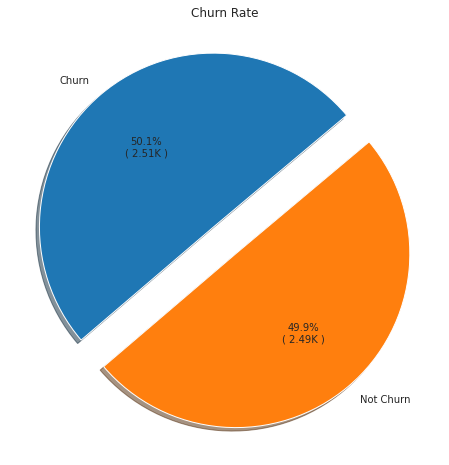

In [258]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n( {:.2f}K )".format(pct,round(absolute/1000,2))

fig,ax=plt.subplots(figsize=(18,8))
churn_rate = telco.churn.value_counts()
churn_rate.plot.pie(explode=[0.1,0.1],
                    labels= ['Churn', 'Not Churn'],
                    ax=ax,shadow=True,startangle=40,
                    autopct=lambda pct: func(pct, churn_rate))

ax.set_title('Churn Rate')
ax.set_ylabel('');

In [259]:
features=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Telecom_customer/description.csv", index_col = 0)
features

,Description
Features,
rev_Mean,Average monthly revenue (fee amount)
mou_Mean,Average number of minutes of use per month
totmrc_Mean,Average total monthly recurring fee
da_Mean,Average number of contacts assisted searches
ovrmou_Mean,Average overtime minutes
ovrrev_Mean,Average overage revenue
vceovr_Mean,Average revenue of voice excess
datovr_Mean,Average revenue of data redundancy
roam_Mean,Average number of roaming calls


## FUNCTIONS

#### Description Functions

In [260]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Median = df.quantile(0.5)
    Mean = df.mean()
    Mode = df.mode().loc[0]
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max', 'Mean', 'Median','Mode']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max, Mean, Median, Mode], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

In [261]:
!pip install colorama
def column_details(regex, df):
  # We will focus on each column in detail
  # Uniqe Values, DTYPE, NUNIQUE, NULL_RATE
  global columns
  columns=[col for col in df.columns if re.search(regex, col)]

  from colorama import Fore, Back, Style

  print('Unique Values of the Features:\nfeature: DTYPE, NUNIQUE, NULL_RATE\n')
  for i in df[columns]:
      color = Fore.RED if df[i].dtype =='float64' else Fore.BLUE if df[i].dtype =='int64' else Fore.GREEN
      print(f'{i}: {color} {df[i].dtype}, {df[i].nunique()}, %{round(df[i].isna().sum()/len(df[i])*100,2)}\n{Style.RESET_ALL}{pd.Series(df[i].unique()).sort_values().values}\n')
      

In [262]:
def null_values(df, rate=0):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv['Percentage (%)']>rate].sort_values('Percentage (%)', ascending=False)

#### Plot Functions

In [263]:
def labels(ax, df, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=11, xytext=xytext, 
                    textcoords='offset points')

def plot_col(col, df, target='Churn', figsize=(20,6)):

    fig, ax = plt.subplots(1,2,figsize=figsize, sharey=True)

    plt.subplot(121)
    tmp = pd.crosstab(df[col], df[target], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NotChurn', 1:'Churn'}, inplace=True)

    ax[0] = sns.countplot(x=col, data=df, hue=target, 
                  order=np.sort(df[col].dropna().unique()),
                  )
    ax[0].tick_params(axis='x', rotation=90)
    labels(ax[0],df[col].dropna(),(0, 0))
    
    ax_twin = ax[0].twinx()
    # sns.set(rc={"lines.linewidth": 0.7})
    ax_twin = sns.pointplot(x=col, y='Churn', data=tmp, color='black', legend=False, 
                  order = np.sort(df[col].dropna().unique()), 
                  linewidth=0.1)
    

    ax[0].grid()

    plt.subplot(122)
    ax[1] = sns.countplot(x=df[col].dropna(),
                  order= np.sort(df[col].dropna().unique()),
                  )
    ax[1].tick_params(axis='x', rotation=90)
    labels(ax[1],df[col].dropna())
    plt.show()


In [264]:
def plot_cols(regex, figsize, target, df):
  columns=[col for col in df.columns if re.search(regex, col)]
  nrow, ncolumn = len(columns),1

  fig, ax = plt.subplots(nrow, ncolumn,figsize=figsize)

  for i,col in enumerate(columns):
      order = np.sort(df[col].dropna().unique())
      
      plt.subplot(nrow,ncolumn,i+1)
      ax[i] = sns.countplot(x=df[col], data= df, hue=target, order = order)
  #     labels(ax[i],df[col].dropna(),(0,0))
      
      tmp = pd.crosstab(df[col], df[target], normalize='index') * 100
      tmp = tmp.reset_index()
      tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
      
      ax_twin = ax[i].twinx()
  #     sns.set(rc={"lines.linewidth": 1})
      ax_twin = sns.pointplot(x=tmp[col], y=tmp['Fraud'],color='black', order = order)
      ax[i].grid();

In [265]:
def hist_countplot(regex, figsize, nrow=10, ncolumn = 4, target='isFraud', df=pd.DataFrame()):
  plt.figure(figsize=figsize)
  columns=[col for col in df.columns if re.search(regex, col)]

  for i,col in enumerate(columns):
      plt.subplot(nrow,ncolumn,i+1)
      if df[col].dtype!='O':
          sns.histplot(x=df[col], data= df, hue=target)
      else:
          sns.countplot(x=df[col], data= df, hue=target) 

In [266]:
def box_countplot(regex, figsize, nrow=10, ncolumn = 4, target='isFraud', df=pd.DataFrame()):
  plt.figure(figsize=figsize)

  columns=[col for col in df.columns if re.search(regex, col)]

  for i,col in enumerate(columns):
      plt.subplot(nrow,ncolumn,i+1)
      if df[col].dtype!='O':
          sns.boxplot(y=df[col], data= df, x=target)
      else:
          sns.countplot(x=df[col])

In [267]:
def box_labels(ax, df, col1,col2):
    medians = df.groupby([col1])[col2].median().round(2)
    vertical_offset = df[col2].median() * 0.05 # offset from median for display

    for xtick in ax.get_xticks():
        ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
                horizontalalignment='center',size='small',color='w',weight='semibold')

In [268]:
def stripplot(regex, figsize, nrow=10, ncolumn = 4, target='churn', df=pd.DataFrame()):
  plt.figure(figsize=figsize)

  columns=[col for col in df.columns if re.search(regex, col)]

  for i,col in enumerate(columns):
      plt.subplot(nrow,ncolumn,i+1)
      sns.stripplot(y=df[col], data= df, x=target)

#### Correlation Functions

In [269]:
# Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
#                 print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return drops

In [270]:
def corrank(X, threshold=0):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    df = df.sort_values(by='corr',ascending=False).reset_index(drop=True)
    return df[df['corr']>threshold]

In [271]:
import scipy.stats as sts

# References:
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = sts.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#### Outlier Functions

In [272]:
def outliers(s):
  # summary of the outliers
  iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
  upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
  lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
  f = []
  for i in s:
      if i > upper_bound:
          f.append(i)
      elif i < lower_bound:
          f.append(i)
  sums = len(f)
  pros = len(f)/len(s)*100
  d = {'IQR':iqr,
        'Upper Bound':upper_bound,
      'Lower Bound':lower_bound,
      'Sum outliers': sums,'percentage outliers':pros}
  d = pd.DataFrame(d.items(),columns = ['sub','values'])
  return(d)


In [273]:
def capping_outliers(col, whisker=1.5):
  # replace outliers with upper_bound and lower_bound values

  iqr = (np.quantile(df[col], 0.75))-(np.quantile(df[col], 0.25))
  upper_bound = np.quantile(df[col], 0.75)+(whisker*iqr)
  lower_bound = np.quantile(df[col], 0.25)-(whisker*iqr)

  df[col] = np.where(df[col] < upper_bound, 
                                upper_bound,df[col])
  df[col] = np.where(df[col] > lower_bound, 
                                lower_bound,df[col])
  plt.figure(figsize=(12,6))
  sns.boxplot(x= df[col]);
  return df[col]

In [274]:
def replace_outliers(col, replaced_value='median',whisker=1.5):
  # replace outliers with 'median','mean','mode' or an assigned value.

  iqr = (np.quantile(df[col], 0.75))-(np.quantile(df[col], 0.25))
  upper_bound = np.quantile(df[col], 0.75)+(whisker*iqr)
  lower_bound = np.quantile(df[col], 0.25)-(whisker*iqr)
  if replaced_value=='median':
    df[col] = df[col].mask(df[col] > upper_bound, df[col].median())
    df[col] = df[col].mask(df[col] < lower_bound, df[col].median())
  elif replaced_value=='mean':
    df[col] = df[col].mask(df[col] > upper_bound, df[col].mean())
    df[col] = df[col].mask(df[col] < lower_bound, df[col].mean())
  elif replaced_value=='mode':
    df[col] = df[col].mask(df[col] > upper_bound, df[col].mode()[0])
    df[col] = df[col].mask(df[col] < lower_bound, df[col].mode()[0])
  else:
    df[col] = df[col].mask(df[col] > upper_bound, replaced_value)
    df[col] = df[col].mask(df[col] < lower_bound, replaced_value)   

  plt.figure(figsize=(12,6))
  sns.boxplot(x= df[col]);

  return df[col]

In [275]:
def col_plot(df,col_name):
    plt.figure(figsize=(15,6))
    
    plt.subplot(141) # 1 satir x 4 sutun dan olusan ax in 1. sutununda calis
    plt.hist(df[col_name], bins = 20)
    f_sqrt=lambda x:(np.sqrt(x) if x>1 else -np.sqrt(-x) if x<-1 else x)
    f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
    
    # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram ±3z")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name]) # IQR katsayisi, defaultu 1.5
    plt.xlabel("IQR=1.5")

    plt.subplot(143)
    plt.boxplot(df[col_name].apply(f_sqrt), whis = 1.5)
    plt.xlabel("ROOT SQUARE - IQR=1.5")

    plt.subplot(144)
    plt.boxplot(df[col_name].apply(f_log), whis = 1.5)
    plt.xlabel("LOGARITMIC - IQR=1.5")
    plt.show()

In [276]:
def plot_winsorize(df,col_name,down=0, up=0.1):
    plt.figure(figsize = (15, 6))

    winsor=winsorize(df[col_name], (down,up))
    f_sqrt=lambda x:(np.sqrt(x) if x>1 else -np.sqrt(-x) if x<-1 else x)
    root_winsor=winsorize(df[col_name].apply(f_sqrt), (down,up))

    plt.subplot(141)
    plt.hist(winsor, bins = 22)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(root_winsor, bins=22)
    plt.axvline(x=root_winsor.mean()+3*root_winsor.std(),color='red')
    plt.axvline(x=root_winsor.mean()-3*root_winsor.std(),color='red')
    plt.xlabel('root_winsor_col_name')

    plt.subplot(144)
    plt.boxplot(root_winsor, whis = 1.5)
    plt.xlabel("Root & Winsorize - IQR=1.5")
    plt.show() 

In [277]:
def plot_log_winsorize(df,col_name,up=0.1,down=0):
    plt.figure(figsize = (15, 6))

    winsor=winsorize(df[col_name], (down,up))
    f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)
    log_winsor=winsorize(df[col_name].apply(f_log), (down,up))

    plt.subplot(141)
    plt.hist(winsor, bins = 22)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(log_winsor, bins=22)
    plt.axvline(x=log_winsor.mean()+3*log_winsor.std(),color='red')
    plt.axvline(x=log_winsor.mean()-3*log_winsor.std(),color='red')
    plt.xlabel('log_winsor_col_name')

    plt.subplot(144)
    plt.boxplot(log_winsor, whis = 1.5)
    plt.xlabel("Log & Winsorize - IQR=1.5")
    plt.show()

In [278]:
def simplify_column(col, df, threshold=0.005, value='mode'):
  df[col] = df[col].replace(df[col].value_counts(dropna=True)[df[col].value_counts(dropna=True, normalize=True)<threshold].index,df[col].mode()[0] if value=='mode' else 'other')
  return df[col]

### Memory Reduction Functions

In [279]:
# Memory Reduction
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

### Encoders

In [280]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
# def label_encoder(df):
#   for col in df.columns:
#     if df[col].dtype=='object':
#       le = LabelEncoder()
#       df[col] = le.fit_transform(df[col])
#   return df


# from sklearn.preprocessing import LabelEncoder
def label_encoder(cat_cols, df):
  for col in cat_cols:
    # if df[col].dtype=='object':
    if col in df.columns:
      le = LabelEncoder()
      # le.fit(list(df[col].astype(str).values))
      df[col] = le.fit_transform(list(df[col].astype(str).values))
  return df

In [281]:
# Frequency Encoding

def frequency_encoder(cat_cols, df):
  for col in cat_cols:
    if col in df.columns:
      df= df.join(df[col].map(df[col].value_counts(normalize=True)).to_frame().add_suffix('_freq'))
  return df

### Modeling

In [282]:
def plot_feature_importances(model, num=10, figsize=(20,10)):
  feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)[:num]
  plt.figure(figsize=figsize)
  sns.barplot(x=feature_imp, y=feature_imp.index)
  plt.title("Feature Importance")
  plt.show()

## EDA

### Understanding Data

In [283]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 4444 to 18306
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev_Mean          4981 non-null   float64
 1   mou_Mean          4981 non-null   float64
 2   totmrc_Mean       4981 non-null   float64
 3   da_Mean           4981 non-null   float64
 4   ovrmou_Mean       4981 non-null   float64
 5   ovrrev_Mean       4981 non-null   float64
 6   vceovr_Mean       4981 non-null   float64
 7   datovr_Mean       4981 non-null   float64
 8   roam_Mean         4981 non-null   float64
 9   change_mou        4958 non-null   float64
 10  change_rev        4958 non-null   float64
 11  drop_vce_Mean     5000 non-null   float64
 12  drop_dat_Mean     5000 non-null   float64
 13  blck_vce_Mean     5000 non-null   float64
 14  blck_dat_Mean     5000 non-null   float64
 15  unan_vce_Mean     5000 non-null   float64
 16  unan_dat_Mean     5000 non-null   flo

In [284]:
null_values(telco, 10)

,Missing_Records,Percentage (%)
numbcars,2449,48.98
dwllsize,1889,37.78
HHstatin,1885,37.70
ownrent,1647,32.94
dwlltype,1582,31.64
lor,1477,29.54
income,1256,25.12
adults,1128,22.56
infobase,1090,21.80
hnd_webcap,525,10.50


In [285]:
telco.columns

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'churn', 'months',
       'uniqsubs', 'actvsubs', 'new_cell', 'crclscod', 'asl_flag', 'totcalls',
       'totmou', 'totrev', 'adjrev'

In [286]:
telco = telco.drop('Customer_ID', axis=1)

In [287]:
cat_cols = [col for col in telco.columns if telco[col].dtype=='object']

In [288]:
columns=[]
column_details(regex='', df=telco[cat_cols])

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

new_cell:  object, 3, %0.0
['N' 'U' 'Y']

crclscod:  object, 46, %0.0
['A' 'A2' 'AA' 'B' 'B2' 'BA' 'C' 'C2' 'C5' 'CA' 'CC' 'CY' 'D' 'D2' 'D4'
 'D5' 'DA' 'E' 'E2' 'E4' 'EA' 'EC' 'EM' 'G' 'GA' 'GY' 'H' 'I' 'IF' 'J'
 'JF' 'K' 'L' 'M' 'P1' 'U' 'U1' 'V1' 'W' 'Y' 'Z' 'Z1' 'Z4' 'Z5' 'ZA' 'ZY']

asl_flag:  object, 2, %0.0
['N' 'Y']

prizm_social_one:  object, 5, %8.14
['C' 'R' 'S' 'T' 'U' nan]

area:  object, 19, %0.16
['ATLANTIC SOUTH AREA' 'CALIFORNIA NORTH AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'CHICAGO AREA' 'DALLAS AREA' 'DC/MARYLAND/VIRGINIA AREA'
 'GREAT LAKES AREA' 'HOUSTON AREA' 'LOS ANGELES AREA' 'MIDWEST AREA'
 'NEW ENGLAND AREA' 'NEW YORK CITY AREA' 'NORTH FLORIDA AREA'
 'NORTHWEST/ROCKY MOUNTAIN AREA' 'OHIO AREA' 'PHILADELPHIA AREA'
 'SOUTH FLORIDA AREA' 'SOUTHWEST AREA' 'TENNESSEE AREA' nan]

dualband:  object, 4, %0.0
['N' 'T' 'U' 'Y']

refurb_new:  object, 2, %0.0
['N' 'R']

hnd_webcap:  object, 3, %10.5
['UNKW' 'WC'

### Feature Engineering

In [289]:
# # Total number of kids of a customer
# kid_cols = ['kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']
# telco['total_kid']=telco[kid_cols].replace({'Y':1,'U':0}).apply(sum, axis=1)

# # Average number of blocked (failed) voice calls / Average number of voice call attempts made 
# telco['vce_blk_rate'] = (telco['blck_vce_Mean'] / telco['plcd_vce_Mean']).fillna(0)

# # Average number of dropped (failed) voice calls / Average number of voice call attempts made
# telco['vce_drp_rate'] = (telco['drop_vce_Mean'] / telco['plcd_vce_Mean']).fillna(0)

# # Average number of blocked (failed) data calls / Average number of data call attempts made
# telco['dat_blk_rate'] = (telco['blck_dat_Mean'] / telco['plcd_dat_Mean']).fillna(0)

# # Average number of dropped (failed) data calls / Average number of data call attempts made
# telco['dat_drp_rate'] = (telco['drop_dat_Mean'] / telco['plcd_dat_Mean']).fillna(0)

# # Average number of completed voice calls / Average number of voice call attempts made 
# telco['vce_cmpt_rate'] = (telco['comp_vce_Mean'] / telco['plcd_vce_Mean']).fillna(0)

# # Average number of completed data calls / Average number of data call attempts made
# telco['dat_cmpt_rate'] = (telco['comp_dat_Mean'] / telco['plcd_dat_Mean']).fillna(0)

# # Average number of completed searches / Average number of attempted calls
# telco['tot_cmpt_rate'] = (telco['complete_Mean'] / telco['attempt_Mean']).fillna(0)

# # Average number of dropped or blocked calls / Average number of attempted calls
# telco['tot_drp_blk_rate'] = (telco['drop_blk_Mean'] / telco['attempt_Mean']).fillna(0)

# # Average number of voice call attempts made  / Average number of voice and data call attempts made
# telco['vce_dat_ratio'] = (telco['plcd_vce_Mean'] /  (telco['plcd_vce_Mean'] + telco['plcd_dat_Mean'])).fillna(0)

# # (Average monthly usage minutes in the previous three months - Average monthly usage minutes over the customer's lifetime)  / Average monthly usage minutes over the customer's lifetime
# telco['diff_3mon_overall_mou'] = ((telco['avg3mou'] - telco['avgmou']) / telco['avgmou']).fillna(0)

# # (Average monthly searches over the previous three months - Average monthly calls over the customer's lifetime)  / Average monthly calls over the customer's lifetime
# telco['diff_3mon_overall_qty'] = ((telco['avg3qty'] - telco['avgqty']) / telco['avgqty']).fillna(0)

# # (Average monthly income over the previous three months - Average monthly income over the customer's lifetime)  / Average monthly income over the customer's lifetime
# telco['diff_3mon_overall_rev'] = ((telco['avg3rev'] - telco['avgrev']) / telco['avgrev']).fillna(0)

# # (Average monthly usage minutes in the previous six months - Average monthly usage minutes over the customer's lifetime)  / Average monthly usage minutes over the customer's lifetime
# telco['diff_6mon_overall_mou'] = ((telco['avg6mou'] - telco['avgmou']) / telco['avgmou']).fillna(0)

# # (Average monthly searches over the previous six months - Average monthly calls over the customer's lifetime)  / Average monthly calls over the customer's lifetime
# telco['diff_6mon_overall_qty'] = ((telco['avg6qty'] - telco['avgqty']) / telco['avgqty']).fillna(0)

# # (Average monthly income over the previous six months - Average monthly income over the customer's lifetime)  / Average monthly income over the customer's lifetime
# telco['diff_6mon_overall_rev'] = ((telco['avg6rev'] - telco['avgrev']) / telco['avgrev']).fillna(0)

# # Number of missing values in every observation
# telco['total_nulls'] = data.isnull().sum(axis=1)

# # analog to digital transformation
# telco['eqpdays_digitized'] = np.digitize(telco['eqpdays'], bins=list(range(-30,901,30))+[telco['eqpdays'].max()+1])

# telco.replace([np.inf, -np.inf], np.nan, inplace=True)

In [290]:
cols_FE = ['vce_blk_rate','vce_drp_rate','dat_blk_rate','dat_drp_rate','vce_cmpt_rate','dat_cmpt_rate','tot_cmpt_rate',
          'tot_drp_blk_rate','vce_dat_ratio','diff_3mon_overall_mou','diff_3mon_overall_qty','diff_3mon_overall_rev',
          'diff_6mon_overall_mou','diff_6mon_overall_qty','diff_6mon_overall_rev']

In [291]:
num_cols = [col for col in telco.columns if telco[col].dtype!='object']
summary(telco[num_cols])

Data shape: (5000, 78)
___________________________
Data Types:
float64    69
int64       9
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max,Mean,Median,Mode
actvsubs,int64,5000,8,0,0.000000,53.000000,1.381600,1.000000,1.00000
adjmou,float64,5000,4274,0,0.000000,120918.020000,7518.166332,5075.000000,807.00000
adjqty,int64,5000,3337,0,0.000000,80890.000000,2845.568800,1790.000000,378.00000
adjrev,float64,5000,4906,0,22.750000,14199.320000,956.022012,723.330000,273.15000
adults,float64,3872,7,1128,1.000000,6.000000,2.529442,2.000000,2.00000
attempt_Mean,float64,5000,1300,0,0.000000,2136.000000,143.872667,101.333333,0.00000
avg3mou,int64,5000,1476,0,0.000000,7456.000000,515.747400,350.000000,0.00000
avg3qty,int64,5000,703,0,0.000000,3909.000000,179.429800,126.000000,0.00000
avg3rev,int64,5000,250,0,1.000000,931.000000,58.658200,48.000000,30.00000
avg6mou,float64,4875,1427,125,0.000000,6597.000000,505.049026,359.000000,0.00000


### Multicolliniarity

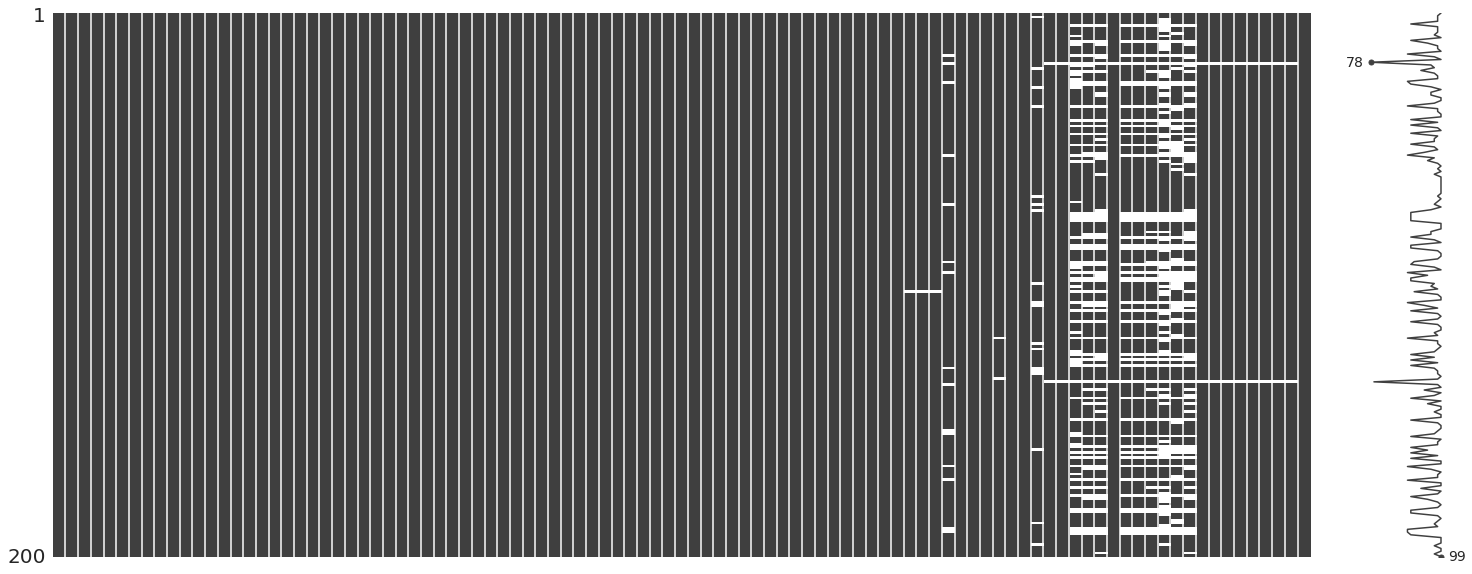

In [292]:
import missingno as msno
msno.matrix(telco.sample(200));

In [293]:
drop_col = remove_collinear_features(telco[num_cols], 0.9)
print(drop_col)

{'adjmou', 'inonemin_Mean', 'peak_vce_Mean', 'adjrev', 'adjqty', 'opk_dat_Mean', 'ovrrev_Mean', 'avg3qty', 'avg3rev', 'cc_mou_Mean', 'avg6mou', 'complete_Mean', 'attempt_Mean', 'avg6qty', 'vceovr_Mean', 'comp_vce_Mean', 'mou_opkd_Mean', 'avg6rev', 'avg3mou', 'comp_dat_Mean', 'totmou'}


In [294]:
telco = telco.drop(drop_col, axis=1)

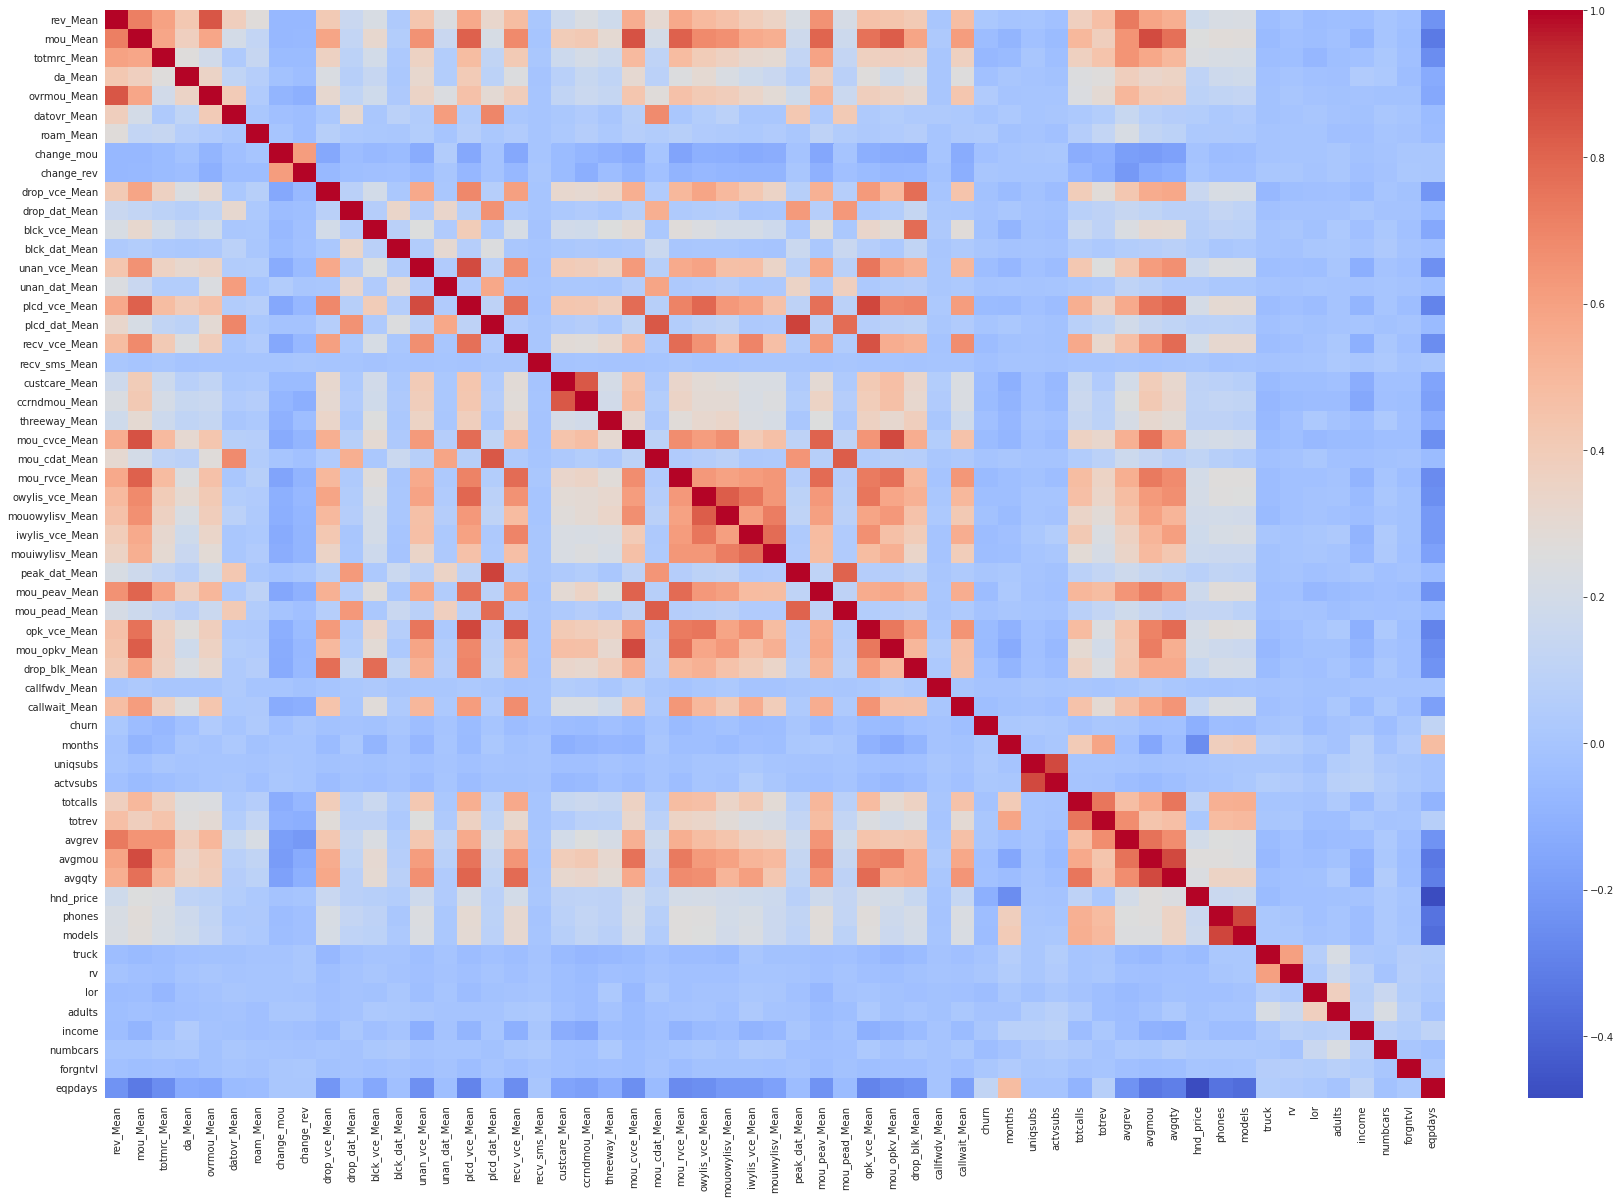

In [295]:
plt.figure(figsize=(30,20))
sns.heatmap(telco.corr(), cmap='coolwarm',annot=False);

In [296]:
cramers_v(telco.dwlltype,telco.dwllsize)

0.9173858769610814

In [297]:
summary(telco[['dwlltype','dwllsize']])

Data shape: (5000, 2)
___________________________
Data Types:
object    2
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max,Mean,Median,Mode
dwllsize,object,3111,16,1889,NaN,NaN,NaN,NaN,A
dwlltype,object,3418,3,1582,NaN,NaN,NaN,NaN,S


In [298]:
# plot_col('dwlltype', df=telco, target='churn')
# plot_col('dwllsize', df=telco, target='churn')

In [299]:
telco = telco.drop('dwlltype', axis=1)

### Frequency Encoding

In [300]:
cat_cols = [col for col in telco.columns if telco[col].dtype=='object']
num_cols = [col for col in telco.columns if telco[col].dtype!='object']

In [301]:
telco[cat_cols].describe(include=['O']).T

,count,unique,top,freq
new_cell,5000,3,U,3341
crclscod,5000,46,AA,1860
asl_flag,5000,2,N,4306
prizm_social_one,4593,5,S,1644
area,4992,19,NEW YORK CITY AREA,569
dualband,5000,4,Y,3591
refurb_new,5000,2,N,4279
hnd_webcap,4475,3,WCMB,3777
ownrent,3353,2,O,3254
marital,4912,5,U,1894


In [302]:
telco = frequency_encoder(cat_cols, telco)
telco.shape

(5000, 97)

In [303]:
FE_dict= dict()
for col in cat_cols:
  FE_dict[col+"_freq"] = telco[col].value_counts(normalize=True).to_dict()

In [304]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/FE_dict.pkl', 'wb') as handle:
    pickle.dump(FE_dict, handle, protocol=4)

with open('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/FE_dict.pkl', 'rb') as handle:
    FE_dict = pickle.load(handle)

In [305]:
telco = telco.drop(cat_cols, axis=1)
telco.shape

(5000, 77)

### Multivariate Imputation

In [306]:
import gc

telco = reduce_mem_usage(telco)
gc.collect()

Mem. usage decreased to  0.92 Mb (70.5% reduction)


20085

In [307]:
# Iterative Imputer default=BayesianRidge()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

idf = telco.copy()

imp_median = IterativeImputer(missing_values=np.nan, initial_strategy='median', random_state=42)
df_imputed_bayesian = pd.DataFrame(imp_median.fit_transform(idf), index=idf.index, columns=idf.columns)
null_values(df_imputed_bayesian)

,Missing_Records,Percentage (%)


In [308]:
df_imputed_bayesian.to_pickle('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/clean_dataset_11a.pkl')

In [309]:
telco = df_imputed_bayesian.copy()

### PCA

In [310]:
# from sklearn.preprocessing import MinMaxScaler
# PCA_columns = [col for col in cols_FE if col in telco.columns]
# sc = MinMaxScaler()
# telco[PCA_columns] = sc.fit_transform(telco[PCA_columns])

In [311]:
# plt.figure(figsize=(30,6))
# pca = PCA().fit(telco[PCA_columns])
# x = range(1,len(PCA_columns)+1)
# plt.plot(x,np.cumsum(pca.explained_variance_ratio_), "bo-")
# plt.xlabel("Component Count")
# plt.ylabel("Variance Ratio")
# plt.xticks(range(1,telco[PCA_columns].shape[1]+1))
# plt.grid()
# plt.show()

In [312]:
# pca = PCA(n_components = 3)
# pca.fit(telco[PCA_columns])
# pca_telco = pca.transform(telco[PCA_columns])

# np.cumsum(pca.explained_variance_ratio_)

In [313]:
# pca_telco = pd.DataFrame(data = pca_telco).add_prefix('pca_')
# telco = pd.concat([telco, pca_telco], ignore_index=False, sort=False, axis=1)
# telco.drop(PCA_columns, axis=1, inplace=True)

In [314]:
telco.to_pickle('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/clean_dataset_11b.pkl')

### Handling Outliers

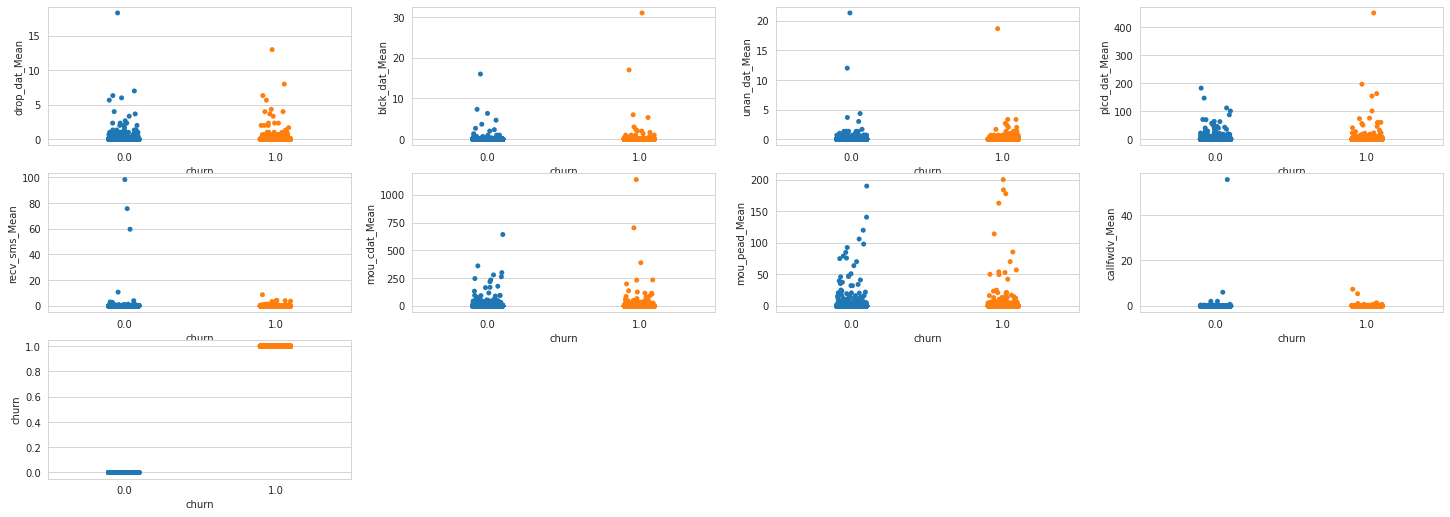

In [315]:
outliers_cols= ['drop_dat_Mean','blck_dat_Mean', 
               'unan_dat_Mean', 'plcd_dat_Mean','recv_sms_Mean', 
               'mou_cdat_Mean','mou_pead_Mean','callfwdv_Mean','churn']

stripplot('', figsize=(25,70), nrow=23, ncolumn = 4, target='churn', df=telco[outliers_cols])

In [316]:
telco['drop_dat_Mean'] = telco['drop_dat_Mean'].clip(0,60)
telco['blck_dat_Mean'] = telco['blck_dat_Mean'].clip(0,100)
telco['unan_dat_Mean'] = telco['unan_dat_Mean'].clip(0,40)
telco['plcd_dat_Mean'] = telco['plcd_dat_Mean'].clip(0,550)
telco['recv_sms_Mean'] = telco['recv_sms_Mean'].clip(0,150)
telco['mou_cdat_Mean'] = telco['mou_cdat_Mean'].clip(0,1500)
telco['mou_pead_Mean'] = telco['mou_pead_Mean'].clip(0,400)
telco['callfwdv_Mean'] = telco['callfwdv_Mean'].clip(0,50)

In [317]:
telco.to_pickle('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/clean_dataset_11c.pkl')

##RFECV

In [318]:
telco= pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/clean_dataset_11c.pkl')

In [319]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, scale, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import multiprocessing
from IPython.core.pylabtools import figsize
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

In [320]:
lgb = LGBMClassifier(learning_rate= 0.05, 
                    max_depth= 12, 
                    n_estimators= 1000, 
                    subsample= 0.1)

rfe = RFECV(estimator=lgb, step=10, cv=KFold(n_splits=5, shuffle=False), scoring='accuracy', verbose=2)

X = telco.drop(['churn'], axis=1)
y = telco['churn']

rfe.fit(X, y)

Fitting estimator with 76 features.
Fitting estimator with 66 features.
Fitting estimator with 56 features.
Fitting estimator with 46 features.
Fitting estimator with 36 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
Fitting estimator with 6 features.
Fitting estimator with 76 features.
Fitting estimator with 66 features.
Fitting estimator with 56 features.
Fitting estimator with 46 features.
Fitting estimator with 36 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
Fitting estimator with 6 features.
Fitting estimator with 76 features.
Fitting estimator with 66 features.
Fitting estimator with 56 features.
Fitting estimator with 46 features.
Fitting estimator with 36 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
Fitting estimator with 6 features.
Fitting estimator with 76 features.
Fitting estimator with 66 features.
Fitting estimator with 56 features.
Fitting estimator with 46 featu

RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=1.0, importance_type='split',
                               learning_rate=0.05, max_depth=12,
                               min_child_samples=20, min_child_weight=0.001,
                               min_split_gain=0.0, n_estimators=1000, n_jobs=-1,
                               num_leaves=31, objective=None, random_state=None,
                               reg_alpha=0.0, reg_lambda=0.0, silent=True,
                               subsample=0.1, subsample_for_bin=200000,
                               subsample_freq=0),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=10,
      verbose=2)

In [ ]:
print('Optimal number of features:', rfe.n_features_)

In [ ]:
plt.figure(figsize=(6,4))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [ ]:
rfecv_cols = [col for col in X.columns[rfe.ranking_ == 1]]
len(rfecv_cols)

In [ ]:
rfecv_cols+=['churn']

In [ ]:
telco[rfecv_cols].to_pickle('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/clean_dataset_11d.pkl')

## Building Models

In [ ]:
telco= pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/clean_dataset_11d.pkl')

In [ ]:
print("Percentage of Churned Customer:%",
      round(telco.churn.mean(),5))

In [ ]:
X = telco.drop(['churn'], axis=1)
y = telco['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state =42)

In [ ]:
sc = RobustScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc= sc.transform(X_test)

In [ ]:
cv_acc_train = {}
cv_acc_test = {}
cv_precision = {}
cv_recall = {}
cv_fallout = {}
cv_f1 = {}
cv_AUC = {}

In [ ]:
def plot_result(model, name:str):
  global X_train, X_test, y_train, y_test
  if name=='lr':
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test= sc.transform(X_test)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Evaluation based on a 10-fold cross-validation
  scores = cross_validate(model, X_test, y_test, 
                        scoring=['balanced_accuracy','precision','recall','f1','roc_auc'], cv=10)

  df_scores = pd.DataFrame(scores, index = range(1,11))
  cv_acc_train[name] = cross_val_score(model, X_train, y_train, cv=10, scoring = 'balanced_accuracy').mean()
  cv_acc_test[name] = df_scores.mean()[2:].iloc[0]
  cv_precision[name] = df_scores.mean()[2:].iloc[1]
  cv_recall[name] = df_scores.mean()[2:].iloc[2]
  cv_fallout[name] = (confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred)[0].sum())
  cv_f1[name] = df_scores.mean()[2:].iloc[3]
  cv_AUC[name] = df_scores.mean()[2:].iloc[4]

  # accuracy scores
  print('Average Balanced Accuracy (CV=10), Test Set:', cv_acc_test[name])  
  print('Average Balanced Accuracy (CV=10), Training Set: ', cv_acc_train[name])

  # print classification report
  print(classification_report(y_test, y_pred, zero_division=0))

  # Plot Confusion Matrix
  plot_confusion_matrix(model, X_test, y_test, values_format='d')
  plt.grid(False)
  plt.show()

def get_metrics():
  df_eval = pd.DataFrame(data={'model': list(cv_acc_test.keys()), 
                              'bal_acc_train':list(cv_acc_train.values()),
                              'bal_acc_test': list(cv_acc_test.values()), 
                              'precision': list(cv_precision.values()), 
                              'recall': list(cv_recall.values()), 
                              'fallout':list(cv_fallout.values()), 
                              'f1': list(cv_f1.values()), 
                              'AUC': list(cv_AUC.values())}).round(3)
  return df_eval

### LightGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# lgb_params = {"n_estimators": [500,1000],
#              "subsample":[0.1],
#              "max_depth":[12,15],
#              "learning_rate":[0.1,0.05]}

In [321]:
# lgb_grid= GridSearchCV(lgb, lgb_params, cv = 5, 
#                             n_jobs = -1, verbose = 2).fit(X_train, y_train)

In [322]:
# lgb_grid.best_params_

Average Balanced Accuracy (CV=10), Test Set: 0.6781632369610702
Average Balanced Accuracy (CV=10), Training Set:  0.7037829928416132
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71     12610
         1.0       0.70      0.70      0.70     12390

    accuracy                           0.70     25000
   macro avg       0.70      0.70      0.70     25000
weighted avg       0.70      0.70      0.70     25000



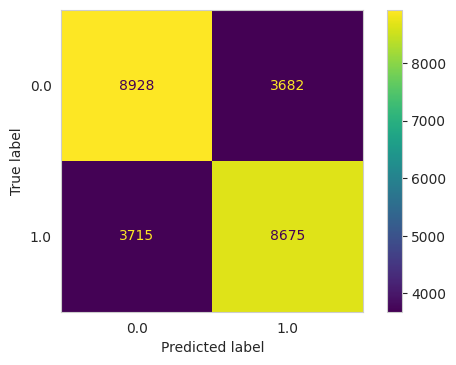

In [323]:
lgb = LGBMClassifier(learning_rate= 0.05, 
                    max_depth= 12, 
                    n_estimators= 1000, 
                    subsample= 0.1)

plot_result(lgb, "lgb")

In [ ]:
# Cross Validation Kfold=10
get_metrics()

### XGBoost Classifer

In [ ]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
plot_result(xgb, "xgb")

In [ ]:
get_metrics()

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
plot_result(rfc, "rfc")

In [ ]:
get_metrics()

### Logistic Regression

In [ ]:
lr=LogisticRegression()
plot_result(lr, "lr")

In [ ]:
get_metrics()

### Feature Importance for XGBoost

In [ ]:
feature_imp = pd.Series(xgb.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(18,12))
sns.barplot(x=feature_imp[:50], y=feature_imp[:50].index)
plt.title("Feature Importance")
plt.show()

### Feature Importance for Random Forest

In [ ]:
feature_imp = pd.Series(rfc.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(18,12))
sns.barplot(x=feature_imp[:50], y=feature_imp[:50].index)
plt.title("Feature Importance")
plt.show()

### Feature Importance for LightGBM

In [ ]:
feature_imp = pd.Series(lgb.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(18,12))
sns.barplot(x=feature_imp[:50], y=feature_imp[:50].index)
plt.title("Feature Importance")
plt.show()

## Compare Models

In [ ]:
df_eval = get_metrics()
df_eval

In [ ]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment

for i,col in enumerate(['bal_acc_test','recall','f1','AUC']):
  plt.subplot(4,1,i+1)
  ax = sns.barplot(x=col, y="model", data=df_eval.sort_values(by=col, ascending=False), palette="Blues_d")
  labels(ax)
  plt.show()

In [ ]:
sns.relplot(x="f1", y="AUC", hue="model", size="bal_acc_test", sizes=(40, 400), 
            alpha=1, palette="bright", height=4, legend='full', data=get_metrics());

### Saving Model

In [ ]:
import pickle
import pandas as pd
pickle.dump(lgb,open("/content/drive/MyDrive/Colab Notebooks/Telecom_customer/LightGBM.pkl","wb"), protocol=4)

## Prediction

In [ ]:
row_number = 5 

features= ['card1', 'card2', 'card4', 'card5', 
           'D1', 'D3', 'D4', 'D5', 'D8', 'D10', 'D11', 'D15', 
           'C1', 'C5', 'C13', 
           'R_emaildomain_1', 'P_emaildomain_1', 
           'TransactionAmt', 'addr1', 'dist1', 
           'Transaction_hour', 'Transaction_day_of_week', 
           'id_19', 'id_20', 'id_33']

my_dict = {col:np.nan for col in features}

for col in features:
  my_dict[col] = data.loc[row_number, my_dict.keys()][col]

# Frequency Encoding
for col in cat_cols:
  my_dict[col+"_freq"] = FE_dict[col+"_freq"][my_dict[col]]

my_dict = pd.DataFrame([my_dict]).drop(cat_cols, axis=1)

In [ ]:
# all_columns=df.drop('isFraud',axis=1).columns
all_columns = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'dist1',
       'C1', 'C5', 'C13', 'D1', 'D3', 'D4', 'D5', 'D8', 'D9', 'D10', 'D11',
       'D13', 'D14', 'D15', 'id_01', 'id_02', 'id_03', 'id_05', 'id_06',
       'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_19', 'id_20',
       'id_32', 'id_33', 'Transaction_hour', 'Transaction_day_of_week',
       'TransactionAmt_to_mean_card1', 'TransactionAmt_to_mean_card4',
       'TransactionAmt_to_std_card1', 'TransactionAmt_to_std_card4',
       'id_02_to_mean_card1', 'id_02_to_mean_card4', 'id_02_to_std_card1',
       'id_02_to_std_card4', 'D15_to_mean_card1', 'D15_to_mean_card4',
       'D15_to_std_card1', 'D15_to_std_card4', 'D15_to_mean_addr1',
       'D15_to_std_addr1', 'TransactionAmt_decimal',
       'TransactionAmt_winsorize', 'TransactionAmt_log', 'TransactionAmt_sqrt',
       'TransactionAmt_z', 'pca_V1', 'pca_V2', 'ProductCD_freq',
       'DeviceInfo_freq', 'DeviceType_freq', 'R_emaildomain_1_freq',
       'R_emaildomain_2_freq', 'R_emaildomain_3_freq', 'P_emaildomain_1_freq',
       'P_emaildomain_2_freq', 'P_emaildomain_3_freq', 'id_12_freq',
       'id_28_freq', 'id_30_freq', 'id_31_freq', 'id_34_freq', 'id_35_freq',
       'id_36_freq', 'id_37_freq', 'id_38_freq', 'M2_freq', 'M3_freq',
       'M4_freq', 'M5_freq', 'M6_freq', 'M7_freq', 'M8_freq', 'M9_freq',
       'card4_freq', 'card6_freq']

In [324]:
X = my_dict.reindex(columns=all_columns, fill_value=0)
X

NameError: ignored

In [ ]:
prediction = lightGBM_model.predict(X)
print("Churn: ",'Yes' if prediction[0] else 'No')

In [ ]:
prediction = lightGBM_model.predict_proba(X)
print(f'The Churn Probability of the Customer is %{round(prediction[0][1]*100,1)}')

In [ ]:
limits_dict = dict()
for col in data.columns:
  limits_dict[col] = [data.col.min(), data.col.max(), data.col.median()]

import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/limits_dict.pkl', 'wb') as handle:
    pickle.dump(limits_dict, handle, protocol=4)

# with open('/content/drive/MyDrive/Colab Notebooks/Telecom_customer/limits_dict.pkl', 'rb') as handle:
#     limits_dict = pickle.load(handle)